In [1]:
%pylab inline
plt.rcParams['figure.figsize'] = (8, 6)

Populating the interactive namespace from numpy and matplotlib


# Ukázka použití knihovny heatlib_const

Nejdřív importujeme knihovnu

In [2]:
from heatlib_const import *

Pak vytvoříme slovník, který obsahuje informace o vlastnostech modelu.
 * `n` - počet uzlů v modelu
 * `k` - konduktivita
 * `H` - producke tepla
 * `rho` - hustota
 * `c` - měrná tepelná kapacita
 * `tc` - velikost domény (mocnost kůry)
 * `T0` - teplota na povrchu (Dirichlet)
 * `q` - tepelný tok na bázi (Neumann)

In [3]:
m = dict(n=100, k=2.25, H=1e-6, rho=2700,
         c=800, tc=35000, T0=0, q=-0.02)

Funkce `init` inicializuje model a vypočte stacionární řešení

In [4]:
init(m)

Funkce `tshow` zobrazí aktuální geotermu.

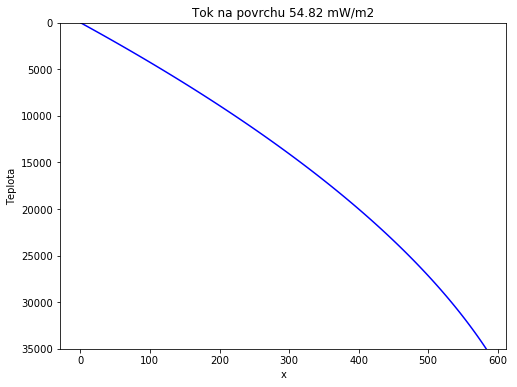

In [5]:
tshow(m)

Modifikace stacionárního řešení. `t` a `x` jsou proměnné v modelu a obsahují aktuální teplotu a pozici uzlů

In [6]:
m['t'][(m['x']<10000) & (m['x']>5000)] = 700

Maximální časový krok pro FTCS schému nám vypočte funkce `max_dt`. Proměnné `ysec` a `ma` definují počet vteřin pro jeden rok a milión let.

In [7]:
max_dt(m)/ysec

1901.0912799356208

In [8]:
dt = 1000*ysec

Vypočteme relaxaci geotermy za 100 tisíc let

In [9]:
for j in range(100):
    ftcs(m, dt)

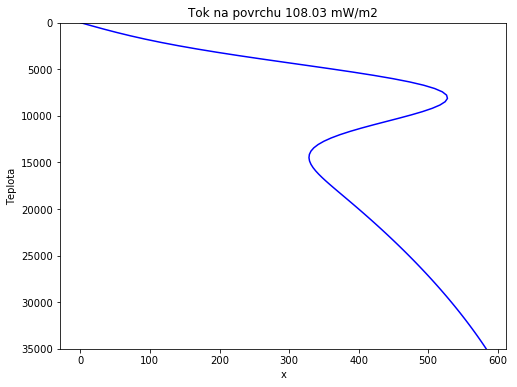

In [10]:
tshow(m)